In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## QC of mitos oriL labels

In [2]:
# read mitos annotation
names = ['acc', 'start', 'end', 'strand', 'e-value', 'score',  'structure2d']
oril_labels = pd.read_csv('./mitos_oriL_labels.txt', sep='\t', header=None, 
                          usecols=[0, 4, 5, 6, 7, 8, 13], names=names)
oril_labels['acc'] = oril_labels['acc'].apply(lambda x: x[:-1] + '.' + x[-1])
oril_labels['len'] = oril_labels.end - oril_labels.start
oril_labels

,acc,start,end,strand,e-value,score,structure2d,len
0,NC_011943.1,5311,5344,1,2.800000e-08,35.7,(((((((((................))))))))),33
1,NC_048988.1,5318,5347,1,5.100000e-07,31.3,(((((((((............))))))))),29
2,NC_026900.1,5317,5346,1,1.200000e-06,30.0,(((((((((............))))))))),29
3,NC_023781.1,5313,5342,1,5.100000e-07,31.3,(((((((((............))))))))),29
4,NC_011180.1,5354,5386,1,7.400000e-07,30.7,(((((((((...............))))))))),32
...,...,...,...,...,...,...,...,...
6361,NC_071217.1,5299,5332,1,1.200000e-07,33.6,(((((((((................))))))))),33
6362,NC_088490.1,5303,5336,-1,7.300000e-07,30.8,(((((((((................))))))))),33
6363,NC_026867.1,5122,5149,1,7.600000e-07,30.7,(((((((((..........))))))))),27
6364,NC_003167.1,5222,5256,1,6.700000e-05,23.8,(((((((((.................))))))))),34


In [3]:
# check missing values
oril_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc          6366 non-null   object 
 1   start        6366 non-null   int64  
 2   end          6366 non-null   int64  
 3   strand       6366 non-null   int64  
 4   e-value      6366 non-null   float64
 5   score        6366 non-null   float64
 6   structure2d  6366 non-null   object 
 7   len          6366 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 398.0+ KB


In [ ]:
#check strand of OriL
oril_labels.strand.value_counts()

 1    5546
-1     820
Name: strand, dtype: int64

In [ ]:
# drop genomes with duplicated oriL
genomes_with_dups = oril_labels.acc.value_counts()
genomes_with_dups = genomes_with_dups[genomes_with_dups > 1].index.values
oril_labels = oril_labels[~oril_labels.acc.isin(genomes_with_dups)]
genomes_with_dups.shape, oril_labels.shape

((88,), (6185, 8))

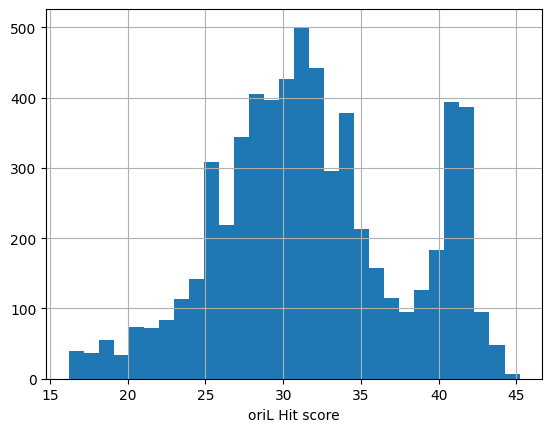

In [ ]:
# Show Hit score of annotated OriL
oril_labels.score.hist(bins=30).set_xlabel('oriL Hit score');

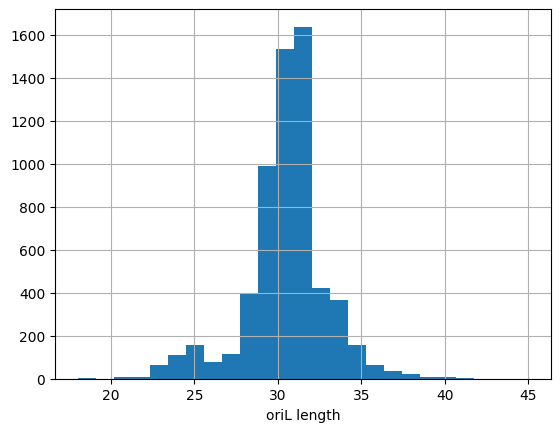

In [ ]:
# check Ori size distribution
oril_labels['len'].hist(bins=25).set_xlabel('oriL length');

### Compare mitos oriL predictions with genbank labels

In [4]:
df_loc = pd.read_csv('./cytb_and_oriL_location_genbank_annot.csv')
df_loc

,acc,organism,ori_start,ori_end,ori_strand,cytb_start,cytb_end,cytb_strand,ori_len,cytb_len,cytb_relative_loc
0,NC_080231.1,Pama pama,NaN,NaN,NaN,14391.0,15532.0,1.0,NaN,1141.0,NaN
1,NC_065807.1,Sciurus anomalus,5184.0,5215.0,1.0,14175.0,15315.0,1.0,31.0,1140.0,8991.0
2,NC_060619.1,Pomatoschistus minutus,NaN,NaN,NaN,14351.0,15492.0,1.0,NaN,1141.0,NaN
3,NC_012825.1,Cynoglossus semilaevis,NaN,NaN,NaN,15426.0,16563.0,1.0,NaN,1137.0,NaN
4,NC_007693.1,Manouria emys,NaN,NaN,NaN,14216.0,15360.0,1.0,NaN,1144.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7827,NC_082237.1,Mesechinus dauuricus,NaN,NaN,NaN,14205.0,15345.0,1.0,NaN,1140.0,NaN
7828,NC_060375.1,Myanophis thanlyinensis,6111.0,6147.0,1.0,15001.0,16118.0,1.0,36.0,1117.0,8890.0
7829,NC_027169.1,Sinocyclocheilus anshuiensis,NaN,NaN,NaN,15334.0,16475.0,1.0,NaN,1141.0,NaN
7830,NC_027168.1,Sinocyclocheilus rhinocerous,NaN,NaN,NaN,15305.0,16446.0,1.0,NaN,1141.0,NaN


In [5]:
# merge genbank and mitos annotations
colmap = {'start': 'ori_start_mitos', 'end': 'ori_end_mitos', 
          'len': 'ori_len_mitos', 'strand': 'ori_strand_mitos'}
_mitos_annot = oril_labels[['acc', 'start', 'end', 'len', 'strand']].rename(columns=colmap)

df_loc_with_mitos = df_loc.merge(_mitos_annot, 'left', 'acc')
df_loc_with_mitos['cytb_relative_loc_mitos'] = df_loc_with_mitos.cytb_start - df_loc_with_mitos.ori_start_mitos
df_loc_with_mitos['cytb_relative_loc_mitos_abs'] = df_loc_with_mitos['cytb_relative_loc_mitos'].abs()
df_loc_with_mitos

,acc,organism,ori_start,ori_end,ori_strand,cytb_start,cytb_end,cytb_strand,ori_len,cytb_len,cytb_relative_loc,ori_start_mitos,ori_end_mitos,ori_len_mitos,ori_strand_mitos,cytb_relative_loc_mitos,cytb_relative_loc_mitos_abs
0,NC_080231.1,Pama pama,NaN,NaN,NaN,14391.0,15532.0,1.0,NaN,1141.0,NaN,5321.0,5353.0,32.0,1.0,9070.0,9070.0
1,NC_065807.1,Sciurus anomalus,5184.0,5215.0,1.0,14175.0,15315.0,1.0,31.0,1140.0,8991.0,5184.0,5214.0,30.0,1.0,8991.0,8991.0
2,NC_060619.1,Pomatoschistus minutus,NaN,NaN,NaN,14351.0,15492.0,1.0,NaN,1141.0,NaN,5285.0,5316.0,31.0,1.0,9066.0,9066.0
3,NC_012825.1,Cynoglossus semilaevis,NaN,NaN,NaN,15426.0,16563.0,1.0,NaN,1137.0,NaN,6360.0,6387.0,27.0,1.0,9066.0,9066.0
4,NC_007693.1,Manouria emys,NaN,NaN,NaN,14216.0,15360.0,1.0,NaN,1144.0,NaN,5237.0,5262.0,25.0,-1.0,8979.0,8979.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7920,NC_082237.1,Mesechinus dauuricus,NaN,NaN,NaN,14205.0,15345.0,1.0,NaN,1140.0,NaN,5204.0,5238.0,34.0,1.0,9001.0,9001.0
7921,NC_060375.1,Myanophis thanlyinensis,6111.0,6147.0,1.0,15001.0,16118.0,1.0,36.0,1117.0,8890.0,6111.0,6146.0,35.0,1.0,8890.0,8890.0
7922,NC_027169.1,Sinocyclocheilus anshuiensis,NaN,NaN,NaN,15334.0,16475.0,1.0,NaN,1141.0,NaN,6267.0,6297.0,30.0,1.0,9067.0,9067.0
7923,NC_027168.1,Sinocyclocheilus rhinocerous,NaN,NaN,NaN,15305.0,16446.0,1.0,NaN,1141.0,NaN,6238.0,6268.0,30.0,1.0,9067.0,9067.0


In [6]:
# read species in spectra dataset
spectra = pd.read_csv('../../1data_derivation/dataset/MutSpecVertebrates192.csv.gz')
spectra = spectra[spectra.Gene == 'Cytb']
species = spectra.Species.str.replace('_', ' ').unique()

In [23]:
# Intersect total annotations with spectra dataset species
species_all = df_loc_with_mitos[
    (df_loc_with_mitos.organism.isin(species)) & 
    (~df_loc_with_mitos.cytb_start.isna()) &
    (~df_loc_with_mitos.cytb_relative_loc_mitos.isna())
].organism.values

_ = df_loc_with_mitos[(df_loc_with_mitos.organism.isin(species))].organism.values
print(f'Only {len(_)} species have been annotates using Mitos (other species have no sequenced full genome)\n')
print(f'{len(species_all)} species out of {len(species)} in spectra dataset have oriL and cytb start labels')
print(f'\n{len(_)-len(species_all)} species out of {len(species)} have missing oriL or cytb start label and cannot be used for analysis')
print()

Only 825 species have been annotates using Mitos (other species have no sequenced full genome)

749 species out of 1697 in spectra dataset have oriL and cytb start labels

76 species out of 1697 have missing oriL or cytb start label and cannot be used for analysis



## Derive relative distance distribution based on mitos oriL location preditions

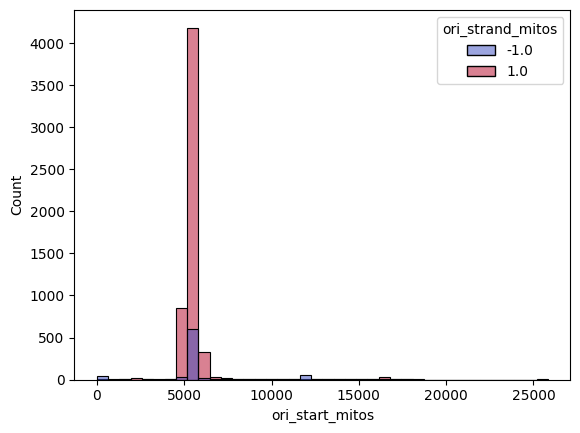

In [8]:
# Plot Ori start position based on Mitos annotation
sns.histplot(data=df_loc_with_mitos, x='ori_start_mitos', 
             hue='ori_strand_mitos', bins=40, palette='coolwarm');

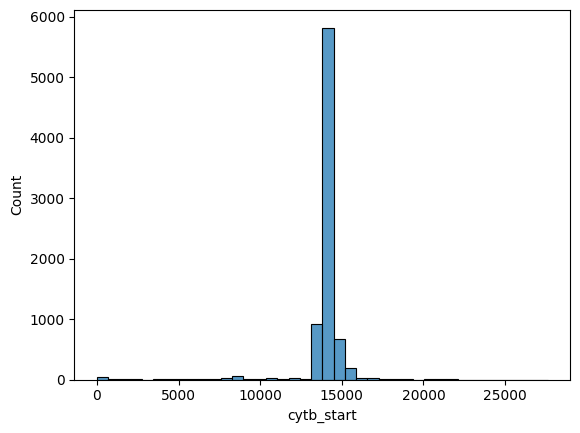

In [10]:
sns.histplot(data=df_loc_with_mitos, x='cytb_start', bins=40);

In [9]:
# check missing values
df_loc_with_mitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7925 entries, 0 to 7924
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   acc                          7925 non-null   object 
 1   organism                     7925 non-null   object 
 2   ori_start                    2220 non-null   float64
 3   ori_end                      2220 non-null   float64
 4   ori_strand                   2220 non-null   float64
 5   cytb_start                   7921 non-null   float64
 6   cytb_end                     7921 non-null   float64
 7   cytb_strand                  7921 non-null   float64
 8   ori_len                      2220 non-null   float64
 9   cytb_len                     7921 non-null   float64
 10  cytb_relative_loc            2220 non-null   float64
 11  ori_start_mitos              6366 non-null   float64
 12  ori_end_mitos                6366 non-null   float64
 13  ori_len_mitos     

In [27]:
# number of species with calculated relative Cytb location
int((~df_loc_with_mitos.cytb_relative_loc_mitos_abs.isna()).sum())

6363

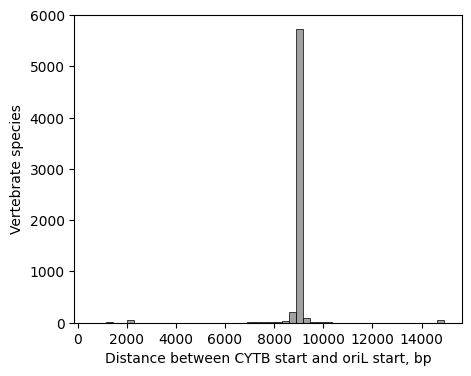

In [11]:
plt.figure(figsize=(5, 4))
ax = sns.histplot(data=df_loc_with_mitos, x='cytb_relative_loc_mitos_abs', bins=50, color='gray')
ax.set_xlabel('Distance between CYTB start and oriL start, bp')
ax.set_ylabel('Vertebrate species')
plt.savefig('./distance_between_oriL_start_and_Cytb_start.pdf', bbox_inches='tight')
plt.show()

In [12]:
df_loc_with_mitos.cytb_relative_loc_mitos.quantile([0.025, 0.25, 0.5, 0.75, 0.975])

0.025    2276.0
0.250    8994.0
0.500    9063.0
0.750    9075.0
0.975    9224.0
Name: cytb_relative_loc_mitos, dtype: float64

**Results:**

- Median distance between Cytb start and oriL start is **9063**
- There are some outliers probably due to incorrect labeling (assume that this is noise)
- 749 out of 1697 species from spectra dataset belong to this analysis. Other species have no labels due to authomatic genome annotation and missing genomes